# 공공데이터 상권정보 분석하기

## __1.1 필요한 라이브러이 불러오기__

In [2]:
import pandas as pd #as : a
import seaborn as sns

## __1.2 시각화를 위한 폰트 설정__

In [3]:
import matplotlib.pyplot as plt
# plt.ro("font", family = "Malgun Gothic")
# 윈도우에서 한글폰트 설정
# plt.ro("font", family = "AppleGothic")
# Mac에서 한글 폰트 설정

plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## __1.3 데이터 로드하기__

In [4]:
df = pd.read_csv("소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
df.shape #행과 열의 수를 확인할 때

(91335, 39)

## __1.4 데이터 미리보기 : head, tail, sample__
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [5]:
# head 로 상위 행의 데이터 출력
# head(n) : n은 숫자 / default = 5
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955


In [6]:
# tail 로 하위 행의 데이터 출력
# tail(n) : n은 숫자 / default = 5
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [7]:
# sample : 미리보기
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
46561,21596420,세명치과의원,NaN,S,의료,S01,병원,S01B04,치과의원,Q86202,...,4213011300111940008006324,NaN,강원도 원주시 행구로 67,220950.0,26331.0,NaN,NaN,NaN,127.96466,37.341893


## __1.5 데이터 요약하기__

### 1.5.1 요약 데이터 보기 : info()

In [8]:
# info : 정보 확인하기(메모리 사용정도, 데이터 타입, nan 등)
df.info()
# >> 아 어떤건 int고 어떤건 str이구나 
# >> 결측치가 있는 것이 많구나

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 1.5.2 데이터의 columns만 보기 : columns

In [9]:
# 컬럼명만 출력
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 1.5.3 데이터의 type만 보기 : dtypes

In [10]:
# 데이터 타입만 출력
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## __1.6 결측치 확인하기__ 
- isnull() : true, false로 출력됨
- isnull().sum() : 각 행마다 결측치가 몇 개가 있는지 확인할 수 있음

In [11]:
nullcount = df.isnull().sum()
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

- 위에서 구한 결측치(nullcount)로 .plot.bar를 통해 막대그래프로 표현하기

<AxesSubplot:>

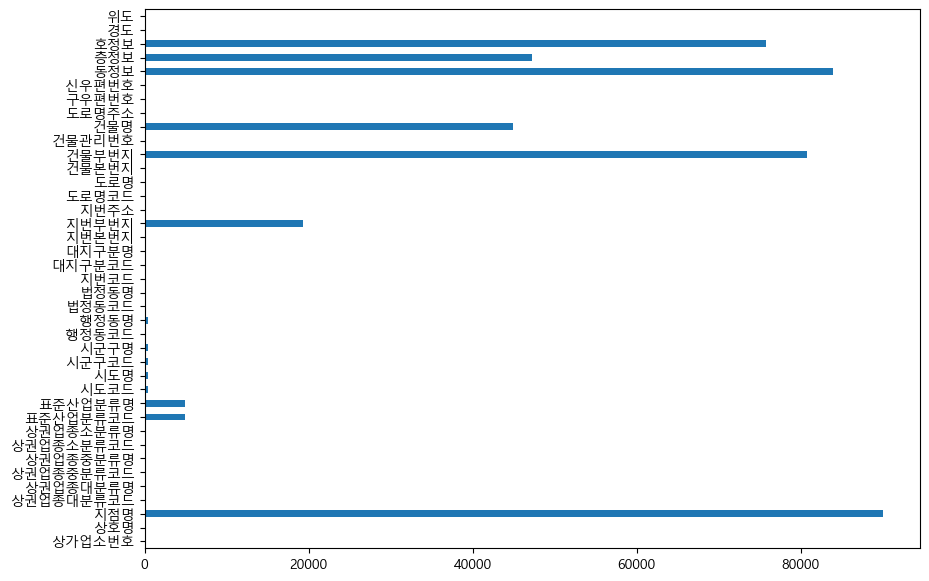

In [12]:
nullcount.plot.barh(figsize = (10,7))
# nullcount.plot.barh(figsize = (5,7))
# figsize = (m,n) : 그래프의 사이즈를 조정해서 겹치지 않도록 할 수 있음
# plot.~ : ~의 형태에 따라 다양한 그래프를 그릴 수 있다

# >> 아래 그래프를 통해 결측치가 어디에 많이 있는지 알 수 있음

In [13]:
nullcount.index

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [14]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 주기

df_nullcount = nullcount.reset_index()
df_nullcount.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## __1.7 컬럼명 변경하기__

In [109]:
# df_nullcount 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경하기

df_nullcount.columns = ["컬럼명", "결측치수"]
df_nullcount.head(4)

# # 원하는 컬럼만 바꾸고 싶을 때
# df_nullcount.rename( columns={"index" : "컬럼명", "0" : "결측치수" })

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0


## __1.8 정렬하기__
- sort_values(by = "정렬시 기준으로 하고싶은 columns", ascending = True or False)

In [16]:
# df_nullcount 데이터프레임에 있는 결측치 컬럼을 sort_values 를 통해 정렬하고
# 결측치가 많은 순으로 상위 10개만 출력하기

df_nullcount_count_top = df_nullcount.sort_values(by="결측치수", ascending=False).head(10)
df_nullcount.sort_values(by="결측치수", ascending=False).head(10)

# >> 결측치를 어떻게 다루느냐에 따라 데이터 분석 결과에 영향을 준다
# >> 결측치가 결과에 영향을 준다 하면 그대로 두고
# >> 결측치가 큰 영향을 주지 않는데, 메모리가 커서 결과 도출까지 오래 걸리면 제거하는 것이 방법이 된다.

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


## __1.9 특정 컬럼만 불러오기__
- NaN = Not a Number로 결측치 의미

In [17]:
df["지점명"]

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [18]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 할당하기
drop_columns = df_nullcount_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [19]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져오기
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


# OLS Example

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [ ]:
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
Y = duncan_prestige.data['income']
X = duncan_prestige.data['education']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [ ]:
results.params

const        10.603498
education     0.594859
dtype: float64

In [ ]:
np.linalg.inv(X.T@X)@X.T@Y

0    10.603498
1     0.594859
dtype: float64

In [ ]:
results.tvalues

const        2.039813
education    6.892802
dtype: float64

In [ ]:
results.pvalues

const        4.754253e-02
education    1.839946e-08
dtype: float64

In [ ]:
results.rsquared

0.5249181546907553

In [ ]:
results.rsquared_adj

0.5138697396835635

In [ ]:
X_tmp = np.array([np.ones(100), np.arange(0,100)]).T
X_tmp.shape

(100, 2)

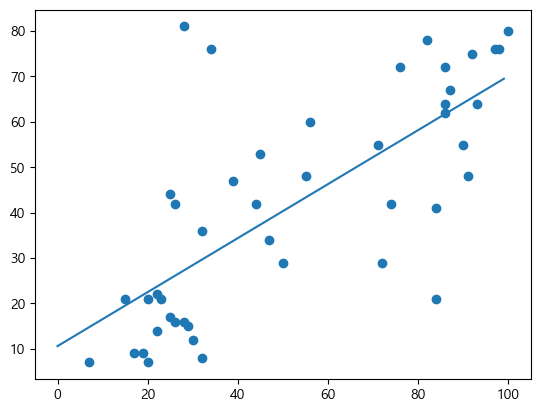

In [ ]:
plt.figure()
plt.scatter( X.iloc[:,1], Y)
plt.plot(X_tmp@results.params) # (100, 2) * (2, 1)